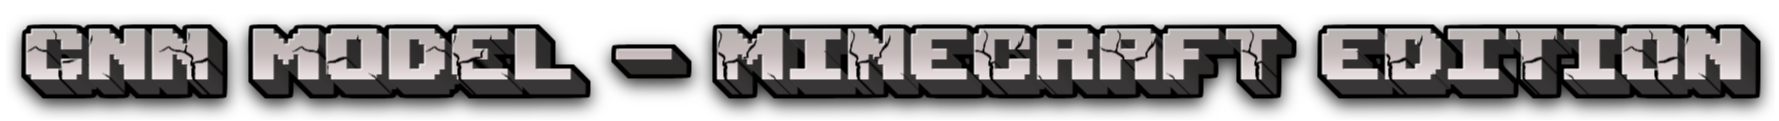



---







<center>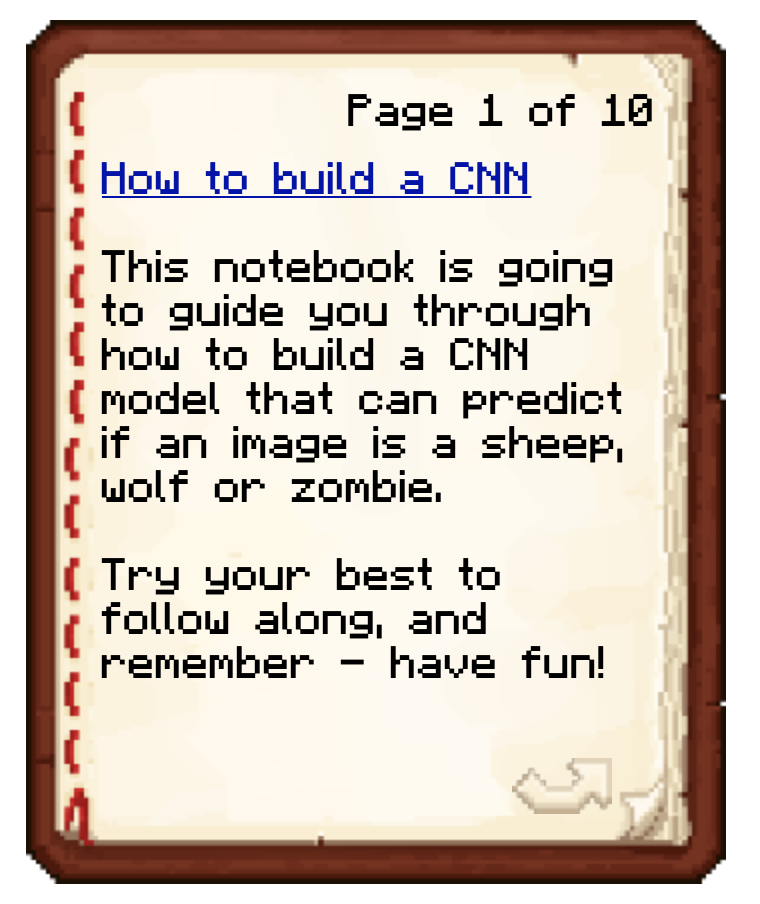</center>

<h1> <b>Python Notebook Tutorial</b> </h1>

- The light grey boxes throughout this document are called cells.
- To run a cell, simply click on it and press Shift and Enter.





Now that you're equipped with everything you need to get through this notebook, let's begin!



---



## **So...What is a CNN?**

First of all CNN stands for Convolutional Neural Network. It's quite the mouthful.

CNN models can be quite complex, but we're going to break it down together.




<center>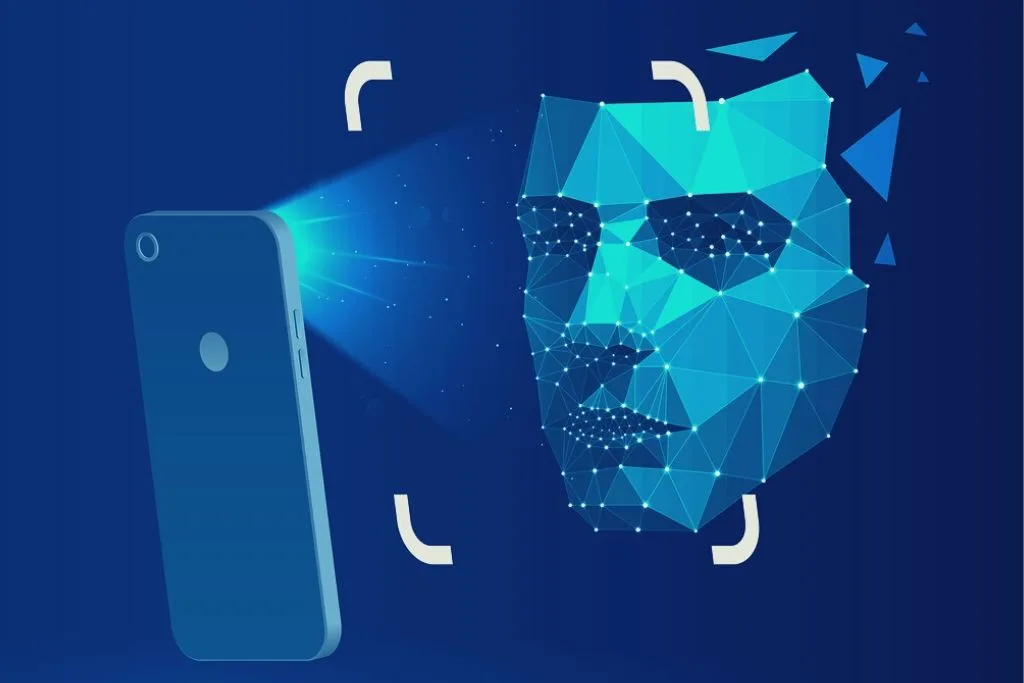</center>






So, have you ever wondered how you can unlock your phone just by showing it your face? Well, you can thank image classification for this magical trick.

CNN models help us classify images. In fact, it's the main approach that Machine Learning Engineers use in their daily work to deliver us incredible technology, such as Facebook automatic tagging, face recognition and even driverless cars.

It's safe to say we use this kind of technology on the daily and we put a lot of trust in it (especially when letting your Tesla play chaffeur).

The magic behind this is as follows: A CNN is an algorithm that takes an image as an input and learns all on its own how to identify the object in the image.

We will explain this in more depth as we go along.




---


# **Retrieve the Training, Validation and Testing Image Datasets**

This part is simple and requires absolutely no downloading or searching for image paths on your behalf!

Simply run the code below, and all of the images that you need to build this model will download into this notebook.

In [1]:
!git clone -l -s git://github.com/rmcgrory2000/ML4Kids.git cloned-repo
%cd cloned_repo
!ls

Cloning into 'cloned-repo'...
remote: Enumerating objects: 4735, done.
remote: Counting objects: 100% (661/661), done.
remote: Compressing objects: 100% (656/656), done.
remote: Total 4735 (delta 3), reused 660 (delta 3), pack-reused 4074
Receiving objects: 100% (4735/4735), 226.51 MiB | 31.69 MiB/s, done.
Resolving deltas: 100% (10/10), done.
Checking out files: 100% (4720/4720), done.
[Errno 2] No such file or directory: 'cloned_repo'
/content
cloned-repo  sample_data


With that out of the way, we can get started on the real tricky stuff.



---



# **Let the Code Commence!**

<center><table><tr><td>
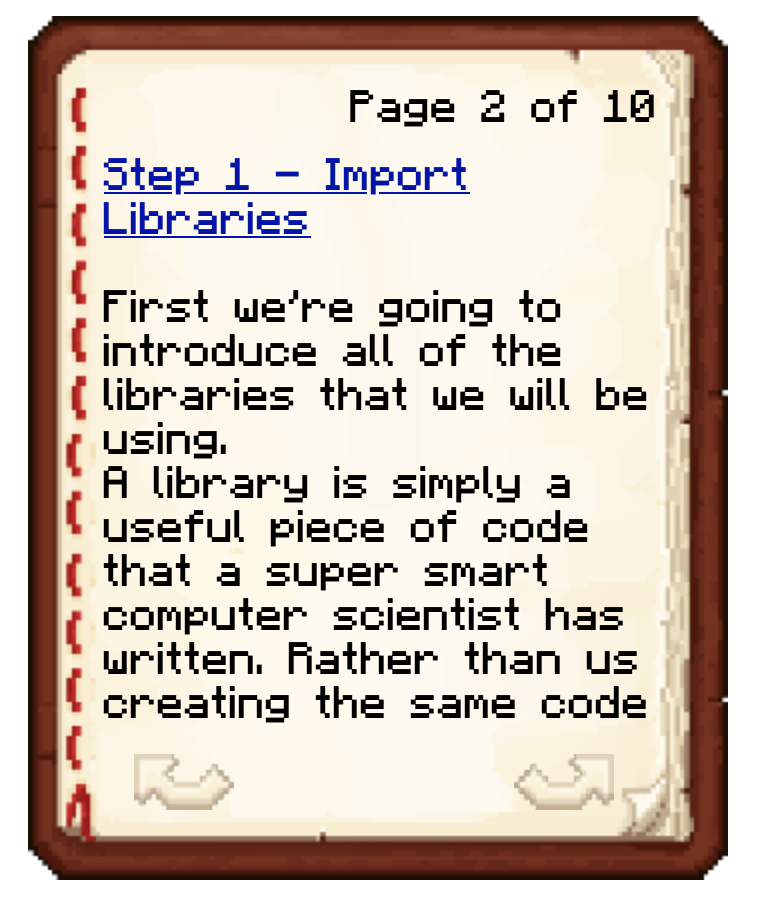</td>
<td> 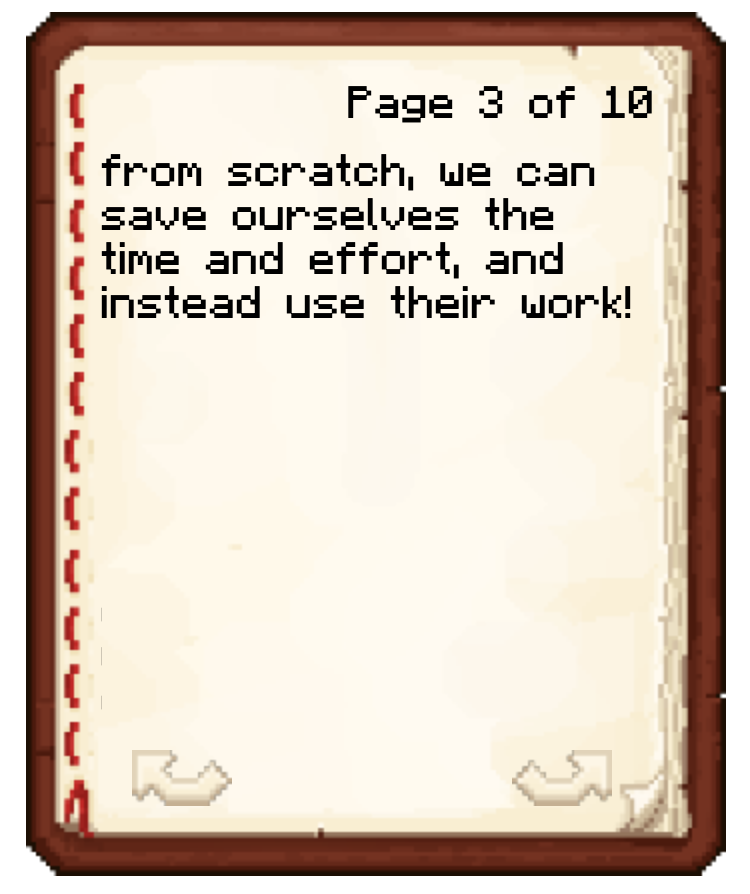 </td>
</td></tr></table></center>

Go ahead and run the code to import all of the necessary libraries. You'll know you've done it correctly when you receive the message "Objective Complete".

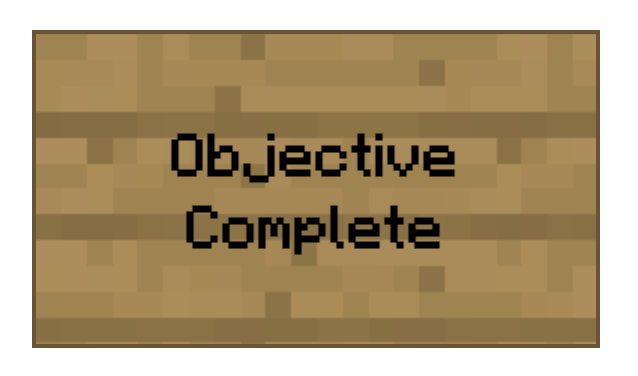

In [2]:
#import libraries
from IPython.display import Image
import os
import cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
import random
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

Image(filename = "/content/cloned-repo/CNN Model/Notebook Images/Objective Complete.png", width = 200, height = 125)



---





<h1> <b>Do Computers Have Eyes?</b></h1>

<h2> <u> How we view the image </u></h2>

Here's an image of a Minecraft wolf.

Pretty standard right? There's nothing unusual about this image and you don't have to think twice about using your eyes to look at it.

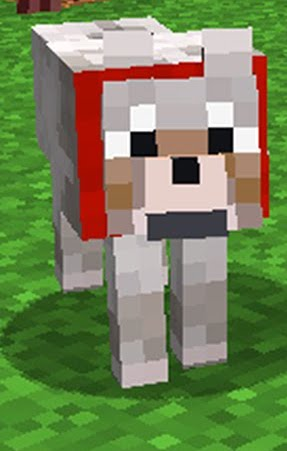

<h2><u> Do Computers Have Eyes?</u> </h2>

How do you look at an image? You just look at it without thinking twice about the process that goes on in your brain, right? 

Well, do computers have eyes? Of course the answer is no. Well how are they going to see the images so that they can learn from them?

Remember those libraries we imported earlier? Well one of those libraries is called 'cv2' and it is super handy for processing the images! By using cv2 we can just guide the computer to each image and it does all of the work for us.


The line below will process the image in the way that the computer can read it!
```
cv2.imread(path_to_images)
```



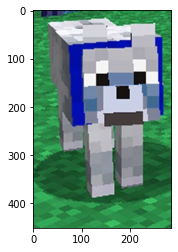

In [31]:
image_array = cv2.imread("/content/cloned-repo/CNN Model/CNN Model Image Dataset/Images to Train Model with/wolf/wolf_train_11.jpg")
plt.imshow(image_array, cmap="magma")
plt.show()

<h2><u> How the Model Prefers the Image to Look</u> </h2>

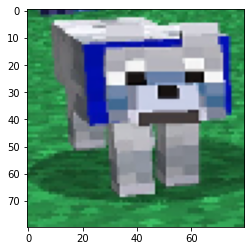



CNN Models need many images to learn from. Think about if you were to pass a stranger once in the street. What is the likelihood that you would remember what they looked like later on that day? Whereas you are sure to recognise the people in your class because you have seen them many times from many different angles.

We need to give our model as many training images as possible - this way it can study the images we give it and try to find patterns in the categories. 

For instance for our training dataset the CNN Model may decide that a zombie can be recognised as a zombie because of its blue shirt.

Let's have a quick look at what we actually do with our images:


And now we're going to do exactly that! We will take the images that we can see, code them into the notebook (which will alter all of the colours!), and then resize the images.

That brings us to step 2...



---




<center><table><tr>
<td> 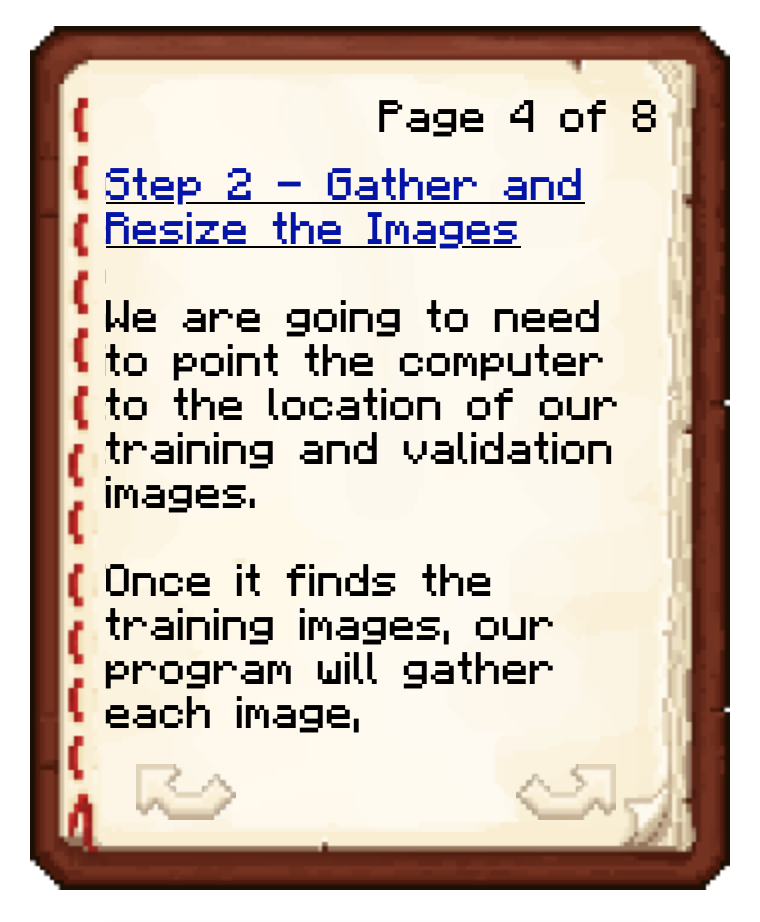</td>
<td> 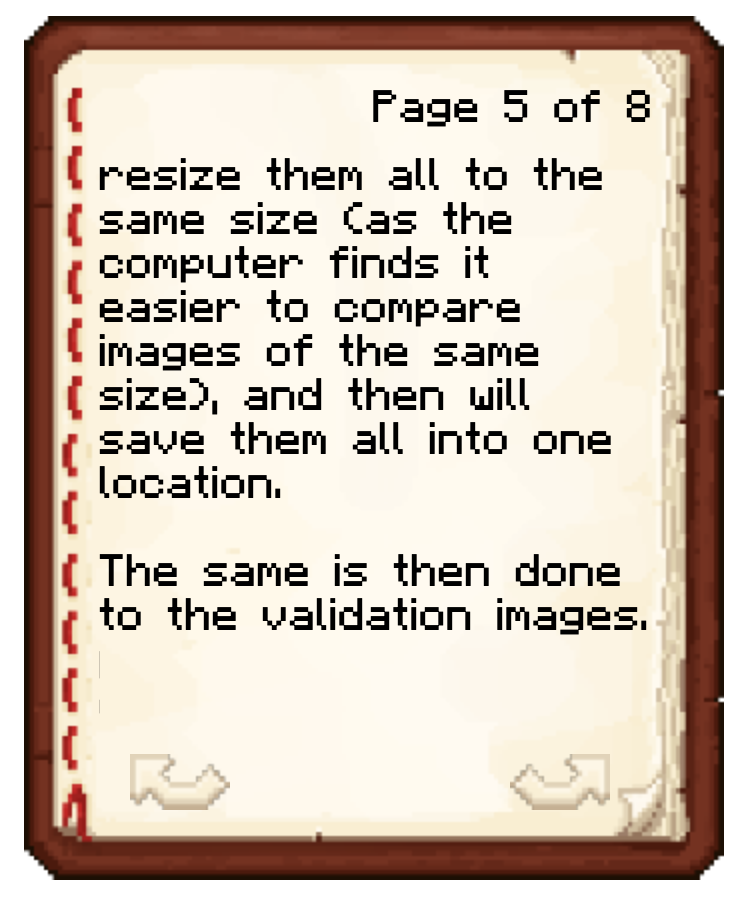</td>
</tr></table></center>

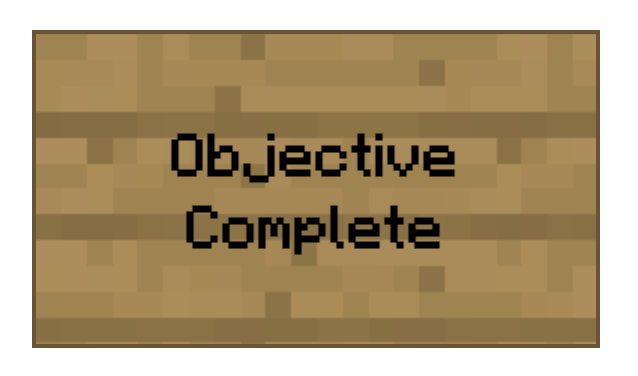

In [5]:
#Point to the location of the training images
path_to_images = "/content/cloned-repo/CNN Model/CNN Model Image Dataset/Images to Train Model with/"

#Size that we would like each image to be (80x80)
size_of_image = 80
minecraft_mob_type = ["sheep", "wolf", "zombie"]
training_data = []
validation_data = []
count = 0
def create_data():
    for category in minecraft_mob_type:
        path = os.path.join(path_to_images, category,"")
        class_num = minecraft_mob_type.index(category)
        for mob_image in os.listdir(path):
            try:
                image_array = cv2.imread(os.path.join(path,mob_image))
                new_array = cv2.resize(image_array, (size_of_image, size_of_image))
                if (count==0):
                    training_data.append([new_array, class_num])
                else:
                    validation_data.append([new_array, class_num])
            except Exception as e:
                continue
                
create_data()
count += 1
path_to_images = "/content/cloned-repo/CNN Model/CNN Model Image Dataset/Images to Validate  Model with/"
create_data()

Image(filename = "/content/cloned-repo/CNN Model/Notebook Images/Objective Complete.png", width = 200, height = 125)

Now how about we check how many images we actually have for the training data and then the validation data?

In [7]:
print('Our training data has', len(training_data), 'images in it.')

Our training data has 500 images in it.


In [8]:
print('Our validation data has',len(validation_data), 'images in it.')

Our validation data has 76 images in it.


As long as there's more than 0 images in each dataset then I think it's safe to say we correctly located the images!

That leads us to our next question...



---





<h2> What are the Training and Validation Images? </h2>

Think about any time you've had to study for an exam. You have notes that you spend time learning from. You will use different methods to try to become knowledgeable on the topic.

Likewise, the model needs to learn from the training images. Rather than an exam in the endgame, the model is expected to correctly guess which Minecraft mob is present in an image. To do this, it will need to study from many training images and find patterns among them.

Now imagine you have got somebody to quiz you on your knowledge. They ask you a question, and you answer to the best of your ability based on what you have studied so far. When you get the answer wrong, they correct you and you learn from your mistakes.

The model does a similar thing with the validation images. It will go through the images and try to guess which mob is present in them. Afterwards it will check the answer, and will learn from its mistakes if it has guessed incorrectly.

In your scenario, you will go between learning notes and getting quizzed so that you can perform to the best of your ability during the exam. In the model's scenario, it will go between the training data and validation data many times until it can give a pretty good guess at an unseen image.



---



So now we have our training and validation images. Recall back to when we imported our libraries. Do you remember one called 'random'? Well we are about to use it.

The 'random' library has many functions, but the one that we're going to use is called 'shuffle'.

Simply put, when we use 'shuffle', all of the items in a list get jumbled up. Why would we need that?

When we brought in our training and validation images, they were added in order. Let's take a look:



In [15]:
for sample in training_data[:10]:
  print(minecraft_mob_type[sample[1]])

sheep
sheep
sheep
sheep
sheep
sheep
sheep
sheep
sheep
sheep


We're literally looking at this!

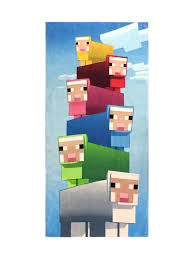



We don't want this. Let's continue to the next step...

<center><table><tr>
<td> 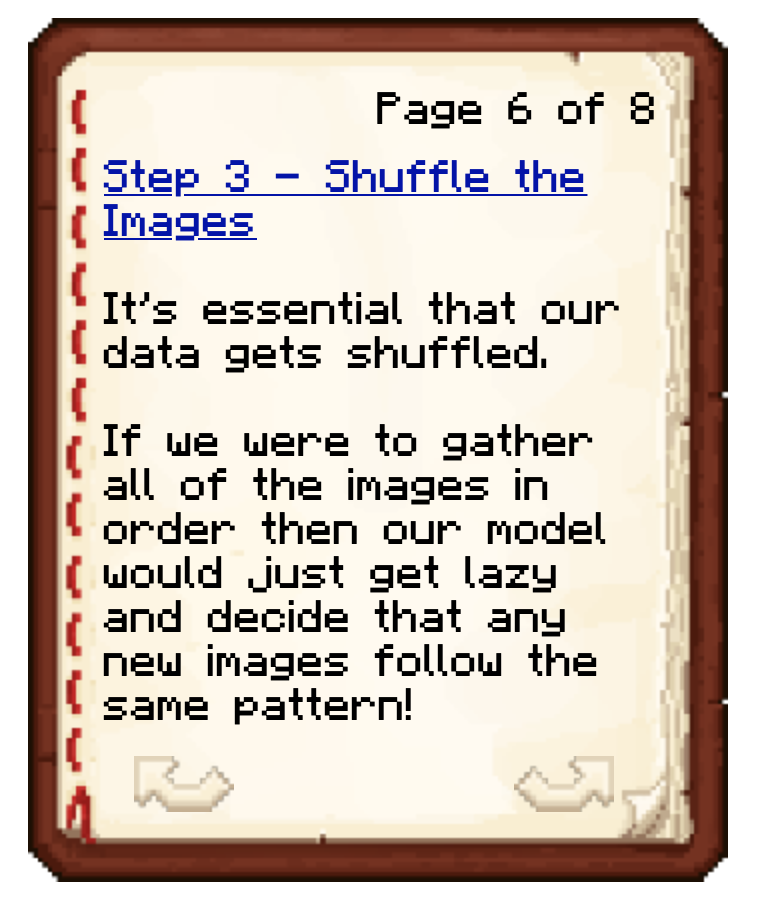</td>
<td> 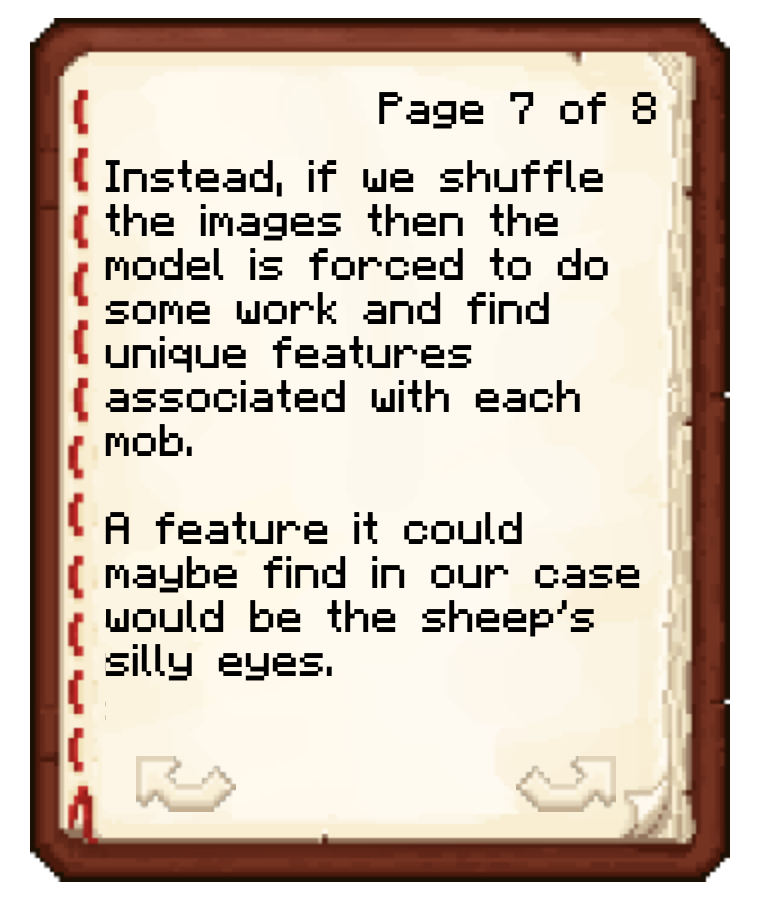</td>
</tr></table></center>

In [16]:
random.shuffle(training_data)
random.shuffle(validation_data)

In [17]:
for sample in training_data[:10]:
  print(minecraft_mob_type[sample[1]])

sheep
zombie
sheep
wolf
zombie
sheep
sheep
sheep
wolf
wolf


That's much better. Now our model can find specific features among the mobs, like the sheep's silly eyes!


---





So far we have got all of our images collected as training and validation sets. We even shuffled each of these sets. 

Now we need to separate the images from their labels. We'll take an image and set it in one pile, and then we'll take the label of that image and place it in a separate pile. The model demands that we present the data to it this way.

Lastly we will reshape and normalize the images. To normalize the image we just divide it by 255.0. It doesn't really matter why we do this, but it's important to understand that it's the only way that the model will accept the data.

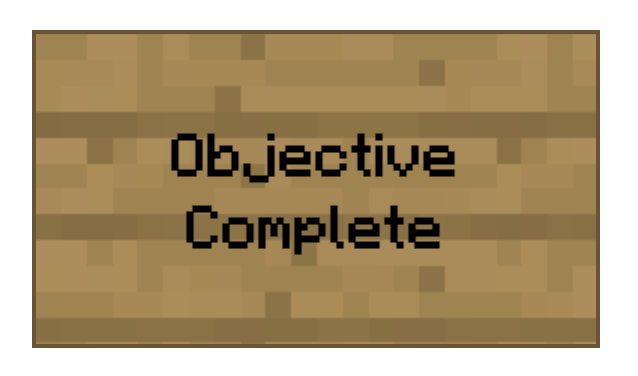

In [18]:
#Training Data
training_features = []
training_labels = []

for features, label in training_data:
    training_features.append(features)
    training_labels.append(label)

training_features = np.array(training_features).reshape(-1, size_of_image, size_of_image, 3)
training_labels = np.array(training_labels)

training_features = training_features/255.0


#Validation Data
validation_features = []
validation_labels = []

for features, label in validation_data:
    validation_features.append(features)
    validation_labels.append(label)

validation_features = np.array(validation_features).reshape(-1, size_of_image, size_of_image, 3)
validation_labels = np.array(validation_labels)

validation_features = validation_features/255.0

Image(filename = "/content/cloned-repo/CNN Model/Notebook Images/Objective Complete.png", width = 200, height = 125)



---




We've now reached the tricky part. Here is where we build the model. Up to this point our model hasn't existed but we're about to bring it to life.

Our model is built up of many layers. We have an input layer, hidden layers and then an output layer.

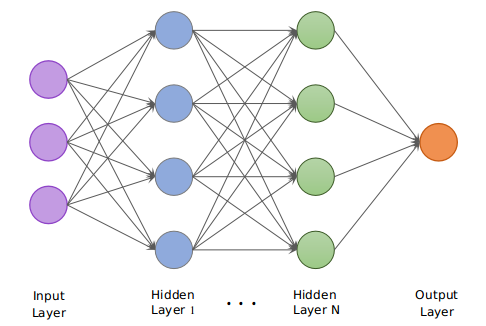

We provide the input layer with an image, and from there each layer carries out mathematical operations on the image and passes it to the next layer.

By the time the image has reached the final layer, it has made a decision on which mob it thinks is in it!

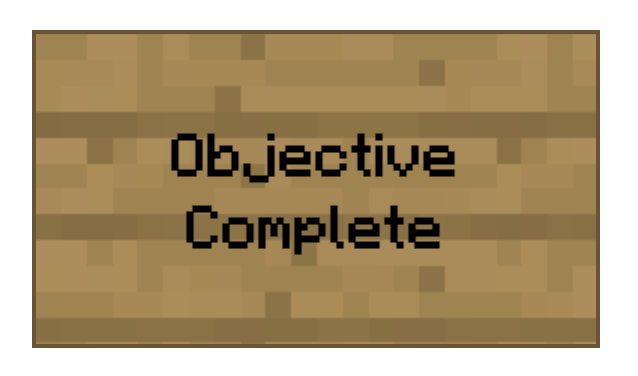

In [19]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(size_of_image, size_of_image, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(3, activation='softmax'))

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

Image(filename = "/content/cloned-repo/CNN Model/Notebook Images/Objective Complete.png", width = 200, height = 125)

In [20]:
model.fit(training_features, training_labels, batch_size=4, epochs=50, validation_data=(validation_features, validation_labels))

Epoch 1/50
125/125 [==============================] - 6s 42ms/step - loss: 1.0765 - accuracy: 0.3980 - val_loss: 1.0353 - val_accuracy: 0.6579
Epoch 2/50
125/125 [==============================] - 5s 40ms/step - loss: 0.9135 - accuracy: 0.6060 - val_loss: 0.8220 - val_accuracy: 0.6974
Epoch 3/50
125/125 [==============================] - 5s 41ms/step - loss: 0.7582 - accuracy: 0.6540 - val_loss: 0.7465 - val_accuracy: 0.7237
Epoch 4/50
125/125 [==============================] - 5s 40ms/step - loss: 0.6845 - accuracy: 0.7020 - val_loss: 0.6902 - val_accuracy: 0.6842
Epoch 5/50
125/125 [==============================] - 5s 40ms/step - loss: 0.5983 - accuracy: 0.7340 - val_loss: 0.5948 - val_accuracy: 0.7632
Epoch 6/50
125/125 [==============================] - 5s 40ms/step - loss: 0.5480 - accuracy: 0.7640 - val_loss: 0.5530 - val_accuracy: 0.7632
Epoch 7/50
125/125 [==============================] - 5s 40ms/step - loss: 0.5630 - accuracy: 0.7500 - val_loss: 0.5068 - val_accuracy: 0.7632